**THIS WILL  BE A ANN MODEL FOR THE DATASET "cifar10"**

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train,x_test = x_train/255.0,x_test/255.0

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [7]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')

 ])


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 389s 247ms/step - loss: 1.8891 - accuracy: 0.3263 - val_loss: 1.7258 - val_accuracy: 0.3836
Epoch 2/10
1563/1563 [==============================] - 382s 244ms/step - loss: 1.6570 - accuracy: 0.4075 - val_loss: 1.5849 - val_accuracy: 0.4317
Epoch 3/10
1563/1563 [==============================] - 345s 221ms/step - loss: 1.5706 - accuracy: 0.4370 - val_loss: 1.5926 - val_accuracy: 0.4296
Epoch 4/10
1563/1563 [==============================] - 363s 232ms/step - loss: 1.5185 - accuracy: 0.4546 - val_loss: 1.5596 - val_accuracy: 0.4442
Epoch 5/10
1563/1563 [==============================] - 365s 233ms/step - loss: 1.4834 - accuracy: 0.4679 - val_loss: 1.5089 - val_accuracy: 0.4556
Epoch 6/10
1563/1563 [==============================] - 371s 237ms/step - loss: 1.4502 - accuracy: 0.4795 - val_loss: 1.4764 - val_accuracy: 0.4731
Epoch 7/10
1563/1563 [==============================] - 369s 236ms/step - loss: 1.4230 - accuracy: 0.4894 - val_

In [10]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
print("Test accuracy : ",test_acc)

313/313 - 8s - loss: 1.4556 - accuracy: 0.4853 - 8s/epoch - 26ms/step
Test accuracy :  0.4853000044822693


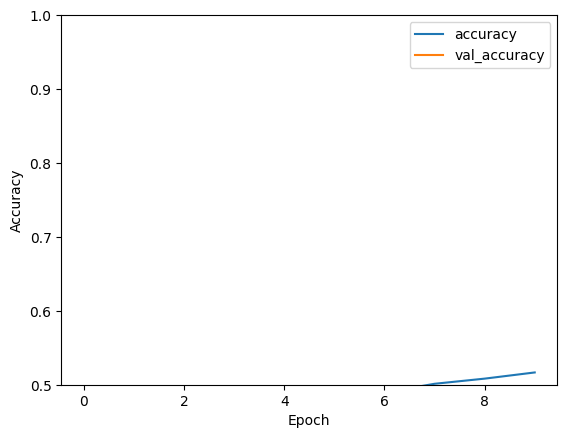

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()

plt.show()

In [12]:
prediction = model.predict(x_test[:5])

1/1 [==============================] - 0s 105ms/step


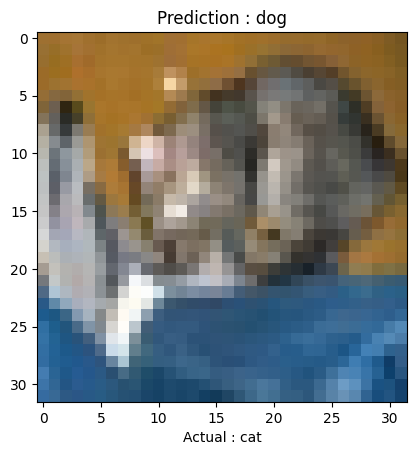

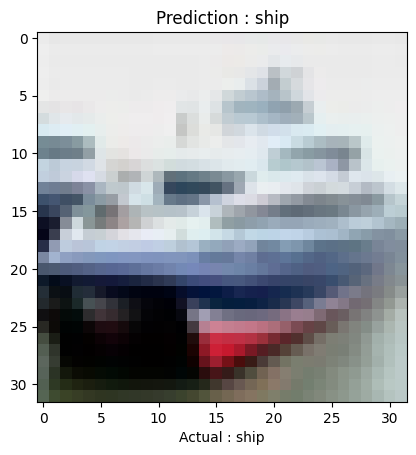

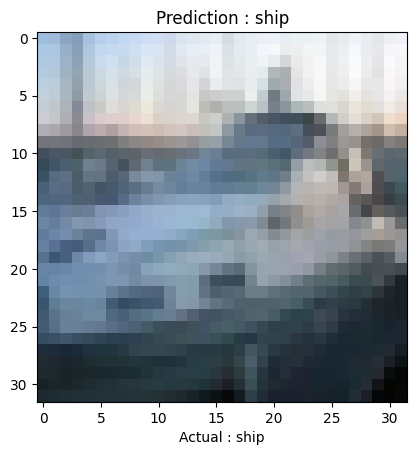

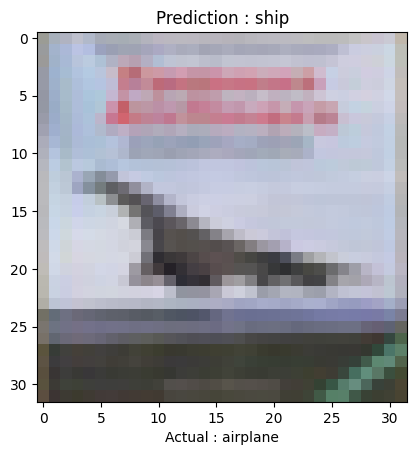

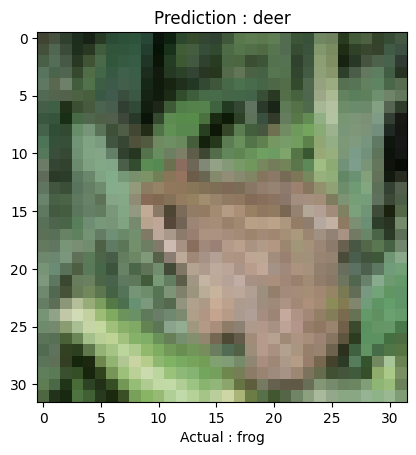

In [13]:
for i in range(5):
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel("Actual : " + class_names[y_test[i][0]])
    plt.title("Prediction : " + class_names[np.argmax(prediction[i])])
    plt.show()